# Causality and supervised machine learning
*Andreas Bjerre-Nielsen*

## Introduction

What is the objective of empirical policy research? 

1. *causation*: what is the effect of a particular variable on an outcome? 
2. *prediction*: find some function that provides a good prediction of $y$ as a function of $x$

## Intution

$$ y = \alpha + \beta x + \varepsilon $$

- *causation*: interested in $\hat{\beta}$ 

- *prediction*: interested in $\hat{y}$ 


## Preparation

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf # module for various regression models

sns.set()

%matplotlib inline

# Causal Inference

## Introduction

Most statistical methods in social science theory is focused on estimating **causal effects**

Causal effect: how does the factor A affect B?

Examples of causal questions:

- what is the effect of being assigned to a shared group on communication?
- what is the effect of sterotypical names on job interview success? 

## Intuition

Variable of interest (often called *treatment*): $D_i$

Outcome of interest: $Y_i$

**Potential outcome framework**
$$
Y_i = \left\{
\begin{array}{rl}
Y_{1i} & \text{if } D_i = 1,\\
Y_{0i} & \text{if } D_i = 0
\end{array} \right.
$$

The observed outcome $Y_i$ can be written in terms of potential outcomes as
$$ Y_i = Y_{0i} + (Y_{1i}-Y_{0i})D_i$$

$Y_{1i}-Y_{0i}$ is the *causal* effect of $D_i$ on $Y_i$. 

But we never observe the same individual $i$ in both states. This is the **fundamental problem of causal inference**. 

## Selection Bias I

We need some way of estimating the state we do not observe (the ***counterfactual***)

Usually, our sample contains individuals from both states - treated and untreated.

So why not do a naive comparison of averages by treatment status? i.e. $E[Y_i|D_i = 1] - E[Y_i|D_i = 0]$

## Selection Bias II
We can rewrite into:
\begin{align}
\nonumber E[Y_i|D_i = 1] - E[Y_i|D_i = 0] = &E[Y_{1i}|D_i = 1] - E[Y_{0i}|D_i = 1] + \\
 \nonumber  &E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0] 
\end{align}


The decomposition:

 - $E[Y_{1i}|D_i = 1] - E[Y_{0i}|D_i = 1] = E[Y_{1i} - Y_{0i}|D_i = 1]$: the average *causal* effect of $D_i$ on $Y$. 

- $E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0]$: difference in average $Y_{0i}$ between the two groups. Likely to be different from 0 when individuals are allowed to self-select into treatment. Often referred to as ***selection bias***. 

## Random assignment solves the problem

Random assignment of $D_i$ solves the problem because random assignment makes $D_i$ independent of potential outcomes

That means that $E[Y_{0i}|D_i = 1] = E[Y_{0i}|D_i = 0]$ and thus that the selection bias term is zero

Intuition: with random assignment, non-treated individuals can be used as counterfactuals for treated (*what would have happened to individual $i$ had he not received the treatment*?)

This allows us to overcome the fundamental problem of causal inference


## Randomization

Holland and Rubin (1986)

> no causation without manipulation


As mentioned, we need to worry when individuals are allowed to self-select

This means that a lot of thought has to go into the *randomization phase*

Randomization into treatment groups has to be manipulated by someone 

But what about effect of *immutable characteristics* such as race, gender, etc.?


## Quasi Experiments

*Quasi-experiments*: randomization happens by "accident"

- Differences in Differences
- Regression Discontinuity Design
- Instrumental variables



## Randomized Controlled Trials

*Randomized controlled trials (RCT)*: randomization done by researcher

- Survey experiments
- Field experiments

Note: difficult to say one is strictly better than the other. Randomization can be impractical and/or unethical. 




## External & internal validity

*Internal validity*: Refers to the validity of causal conclusions

*External validity*: Refers to the extent to which the conclusions of a particular study can be generalized beyond a particular setting

RCTs - external and internal validity
- Kosuke Imai (2016): There is tradeoff.
- Cyrus Samii (2016): No such tradeoff. 


## Observational study

In many cases, social scientists are unable to randomize treatment assignment for ethical or logistic reasons

*Observational study*: No random manipulation of treatment

Strategy: Statistical control (control variables, fixed effects, matching, etc)

Risks: selection & confounding bias and endogeneity. 


## Case: Racial Discrimination in the Labor Market

Does racial discrimination exist in the labor market?

*Experiment*: In response to newspaper ads, researchers send out resumes of fictitious job candidates, varying only the names of the job applicants while leaving all other information in the resumes unchanges

Names were randomized between stereotypically black- and white-sounding names (Lakisha, Jamal, Emily, Greg, etc.)

## Case: Racial Discrimination in the Labor Market (2)

In [38]:
gh_raw = "https://raw.githubusercontent.com/"
user = "kosukeimai/"
repo = 'qss/'
branch = "master/"
filepath = "CAUSALITY/resume.csv"
url = gh_raw + user + repo + branch + filepath

df = pd.read_csv(url,dtype={'race':'category','sex':'category'})

## Case: Racial Discrimination in the Labor Market (3)

Can we use a boxplot? No boxplot not good for binary data.

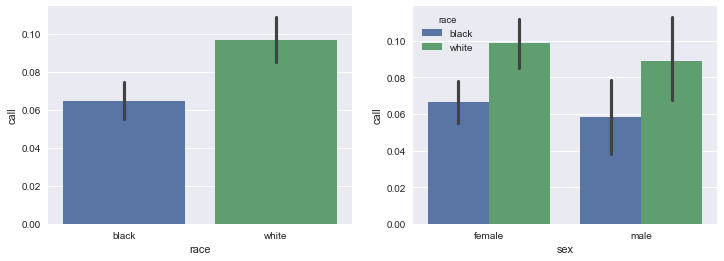

In [3]:
f, ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='race', y='call', data=df, ax=ax[0])
sns.barplot(x='sex', hue='race', y='call', data=df, ax=ax[1])

## Case: Racial Discrimination in the Labor Market (4)

In [39]:
model = smf.ols(formula='call~race*sex', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   call   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.973
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           0.000464
Time:                        09:40:34   Log-Likelihood:                -561.75
No. Observations:                4870   AIC:                             1131.
Df Residuals:                    4866   BIC:                             1157.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0663      0.006     10.595      0.000       0.054       0.079
race[T.white]                 0.0326      0.009      3.677      0.000       0.015       0.050
sex[T.male]                  -0.0080      0.013     -0.606      0.544      -0.034       0.018
race[T.white]:sex[T.male]    -0.0022      0.018     -0.121      0.904      -0.038       0.034
==============================================================================
Omnibus:                     2968.362   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18913.265
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      10.455   Cond. No.                         6.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Case: Racial Discrimination in the Labor Market (5)

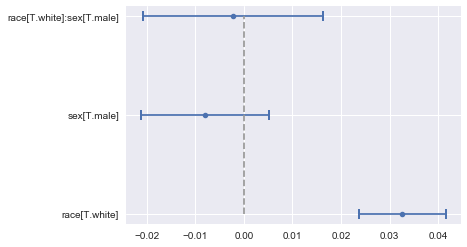

In [5]:
summ_pd = results.summary2() # get summary as pandas tables
params = summ_pd.tables[1].iloc[1:] # pick coefficient tables

m = len(params)
err_args = {'fmt':'.', 'capsize':5, 'markeredgewidth':2}
plt.errorbar(y=range(m), 
             x=params['Coef.'], 
             xerr=params['Std.Err.'],
             **err_args)
plt.yticks(range(m),params.index)
plt.plot((0, 0), (0, m-1), '--', color='0.6')

# Machine learning

## Topics in machine learning

*Supervised Learning*: Models designed to infer a relationship between input and **labeled** training data. These models are used for **prediction**. Examples: OLS, logistic reg.

*Unsupervised Learning*:  Models designed to infer a relationship from **unlabeled** training data. This may involve clustering, dimensionality reduction and more.

# Supervised machine learning

## Prediction

Many policy problems are not about causality but rather about prediction

Sometimes called *prediction policy problems*

- How many people will sign up for Obamacare?
- Who will win the U.S general election in November?
- Who should the Department of Economics hire in the future?

## Who predicts?

* Local governments -> crime, childcare usage, pension payments etc.
* FB/GOOG/AMZN/NTFL/etc. > estimating 'preferences' to improve customer experience / sales
    * ads, status updates, music, movies, news
* Insurance companies -> what your risk of death is
* Stock traders > to trade 
* Robots -> understanding their environment (e.g. self-driving cars)
* You? -> will *Social Data Science* be a fun/rewarding/interesting course to follow?


## Why predict? Glory!

<center><img src='http://www2.pictures.zimbio.com/gi/Chris+Volinsky+Netflix+Awards+1+Million+Netflix+WOtFSoPeoOal.jpg'></center>





## The Netflix Contest


Competition started in October 2006. Training data is ratings for 18K movies by 400K Netflix customers, each rating between 1 and 5

Training data is very sparse - about 98% missing

Objective is to predict the rating for a set of 1 million customer-movie pairs that are missing in the training data

Winner: Averaged 800 models 

## Why predict? Riches!

<center><img src='http://kaggle2.blob.core.windows.net/competitions/hhp/2496/logos/header.png'></center>

[http://www.heritagehealthprize.com/c/hhp](http://www.heritagehealthprize.com/c/hhp)


## Prediction problem types

Predicition problems are often described in terms of the data types they are predicting. 
- The first is **regression** which uses numeric (continuous) variables.
- The second is **classification** which uses categorical (discrete) variables.

Examples?

## Case: Predicting gender from body measures

What type of prediction problem is this? Classification.

- Classification!

## Case: Predicting gender from body measures (2)

In [43]:
print(body.head())

  Gender      Height      Weight  Male
0   Male  189.048364  109.819678   1.0
1   Male  176.081674   73.688955   1.0
2   Male  189.721870   96.584348   1.0
3   Male  183.631305   99.899282   1.0
4   Male  178.897397   93.682809   1.0


In [40]:
gh_raw = "https://raw.githubusercontent.com/"
user = "johnmyleswhite/"
repo = 'ML_for_Hackers/'
branch = "master/"
filepath = "02-Exploration/data/01_heights_weights_genders.csv"
url = gh_raw + user + repo + branch + filepath

body = pd.read_csv(url)
body['Male'] = (body.Gender=='Male').astype(float) # Binary variable
body.Height = body.Height*2.56 # convert inches to cm
body.Weight = body.Weight*0.454 # convert pounds to kg

## Case: Predicting gender from body measures (3)
*Do we already know any machine learning models?*

In [7]:
from sklearn.linear_model import LogisticRegression

X = body[['Weight', 'Height']] # features
y = body.Male # labels

# make classifier and fit model
clf = LogisticRegression().fit(X, y)

# parameter estimates
pd.Series(clf.coef_[0], index=['Weight', 'Height'])

Weight    0.433517
Height   -0.186886
dtype: float64

## Case: Predicting gender from body measures (4)

Logit estimates

$$ P(Y_i = 1 |X_i = x_i) = \frac{1}{1 + e^{-x_i\beta}}$$

This probability is .5 when $x_i\beta = 0$. Thus we can classify predicted gender based on height and weight with the following rule:

$$
\hat{y} = \left\{
\begin{array}{rl}
1 & \text{if } x_i\beta \geq 0,\\
0 & \text{otherwise}
\end{array} \right.
$$

Classifier threshold:
$$ H = \frac{-\alpha - \beta_W W}{\beta_H} $$

## Case: Predicting gender from body measures (5)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

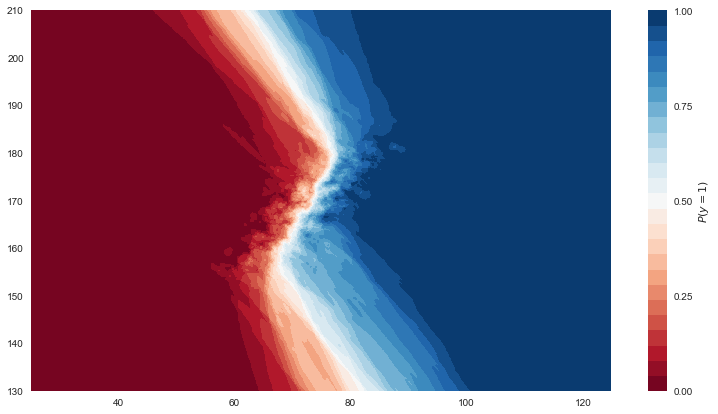

In [44]:
xx, yy = np.mgrid[25:125:.1, 130:210:.08]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(13, 7))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", 
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=10,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=.5, alpha=.3)

ax.set(aspect="equal",
       xlim=(25, 125), ylim=(130, 210),
       xlabel="Weight", ylabel="Height")

## Case: Predicting gender from body measures (6)

**Decision boundary**

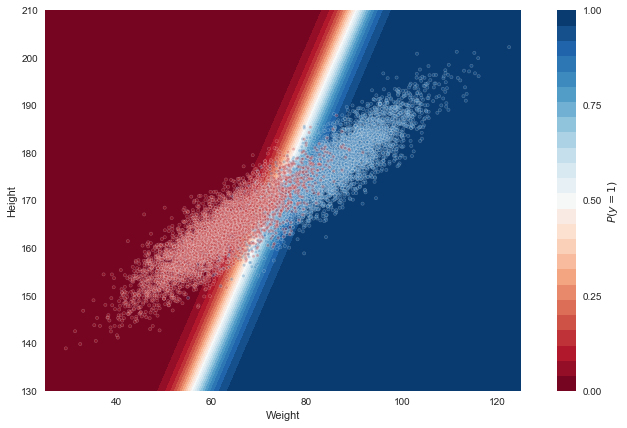

In [9]:
f

## Case: Predicting gender from body measures (7)
Another model: nearest neighbor

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier

X = body[['Weight', 'Height']]
y = body.Male

# make model on data - fifty nearest neighbors
clf = KNeighborsClassifier(n_neighbors=50).fit(X, y)

## Case: Predicting gender from body measures (8)

Computing nearest neighbor decision boundary

[(130, 210),
 (25, 125),
 None]

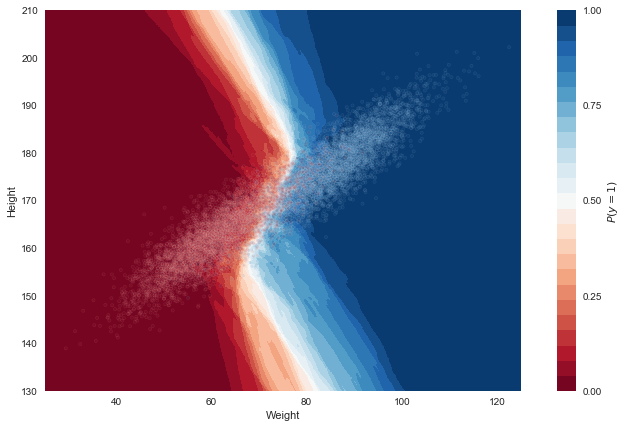

In [46]:
xx, yy = np.mgrid[25:125:.1, 130:210:.08]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(13, 7))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", 
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=10,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=.5, alpha=.1)

ax.set(aspect="equal",
       xlim=(25, 125), ylim=(130, 210),
       xlabel="Weight", ylabel="Height")

## Case: Predicting gender from body measures (9)

Decision boundary: ***non-linear***

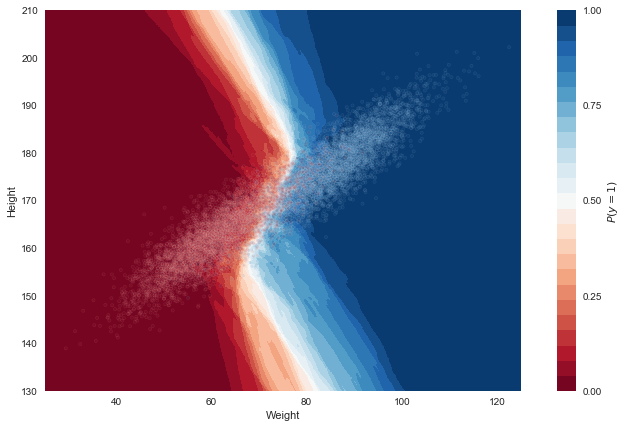

In [12]:
f

# Bias and variance

Are OLS and logistic regression good for prediction?

## The bias-variance tradeoff

OLS is designed to minimize *in sample error*: the error rate you get on the same data set you used to build your predictor.

$$ \text{arg min}_{\beta} \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2  = \text{arg min}_{\beta} (V(\hat{f}(x_0)) + \sigma^2) $$

But for prediction we are interested in minimizing *out of sample error*: the error rate you get on a new data set



## Prediction

Too see this, consider a prediction at a new point (out-of-sample), $x_0$. Our prediction for $y_0$ is then $\hat{f}(x_0)$ and the mean squared error (MSE ) can be decomposed as 

$$ \mathbb{E}[(y_0 - \hat{f}(x_0))^2] = 
\underset{Bias(\hat{f}(x))}{\underbrace{\mathbb{E}[\hat{f}(x_0)-f(x_0)]}}^2 + 
\underset{Var(\hat{f}(x))}{\underbrace{\mathbb{E}[\hat{f}(x_0)^2]-\mathbb{E}[\hat{f}(x_0)]^2}} +
\sigma^2$$

By ensuring zero bias within sample, OLS picks a solution which not be optimal for prediction 
- in many cases we can lower variance while increasing bias a little. 

## Bias and variance

What do we mean by the *variance* and *bias* of an estimator?

- *Bias*: Comes from using erroneous model assumptions, e.g. fitting non-linear fct. $f$ with linear fct. $\hat{f}$. 
    - Can lead to missing relevant patterns in data, i.e. *underfitting*.

- *Variance*: Refers to model complexity. If the model is too complex then small changes to the data will cause the solution to change a lot. 
    - Can lead to finding spurious patterns in data, i.e. *overfitting*.

Machine learning techniques were developed specifically to maximize prediction performance by providing an empirical way to make this bias-variance trade off

## Bias and variance (2)

*So why do we care about bias?*

- By not modelling bias: allows *inference*, i.e. testing hypotheses! (model parameters converge to true parameters) ~ interested in $\hat{\beta}$
    
- By modelling bias: allows better predictive models as they trade off bias and variance. Interested in $\hat{y}$

# Out-of-sample measures

## Key concepts

- Training data: where we estimate our model
- Test data: where we evaluate the model's accuracy

## Error

Statistical learning models are designed to minimize *out of sample error*: the error rate you get on a new data set

Key ideas

- Out of sample error is what you care about
- In sample error $<$ out of sample error
- The reason is overfitting (matching your algorithm to the data you have)

## Error measures (continuous variables)

**Mean absolute error (MAE)**:

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|$$

**Mean squared error (MSE)**:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

**Root mean squared error (RMSE)**:

$$\sqrt{MSE}$$

**Question:** what is the difference?


In [47]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

## Case: Longevity

In [14]:
gh_raw = "https://raw.githubusercontent.com/"
user = "johnmyleswhite/"
repo = "ML_for_Hackers/"
branch = "master/"
filepath = "05-Regression/data/longevity.csv"
url = gh_raw + user + repo + branch + filepath

longevity = pd.read_csv(url)

print(longevity.head())

   Smokes  AgeAtDeath
0       1          75
1       1          72
2       1          66
3       1          74
4       1          69


## Case: Longevity (2)

In [59]:
y_true = longevity.AgeAtDeath

def rmse_year(y):    
    '''
    Takes as input: year (y)
    Outputs: root mean squared of guessing y 
    '''
    y_pred = [y]*len(longevity)
    return np.sqrt(mse(y_true, y_pred))


# normal for loop
rmse_years = []    

for y in range(60,91):
    rmse_years.append((y, rmse_year(y)))
    
# list comprehenseion:
rmse_years = [(y, rmse_year(y)) for y in range(60,91)]
    
rmse_data = pd.DataFrame(data = rmse_years,
                         columns = ['age', 'rmse'])

# print ('Best guess:', rmse_data.set_index('year').rmse.idxmin())
#rmse_data.plot.scatter('age', 'rmse')

## Case: Longevity (3)

Best guess: 73


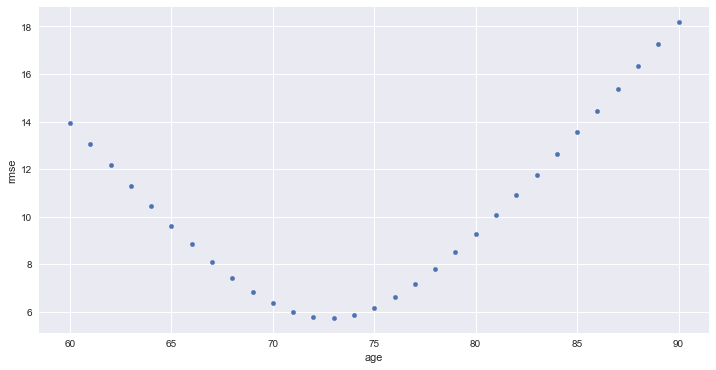

In [58]:
f,ax = plt.subplots(figsize=(12,6))
print ('Best guess:', rmse_data.set_index('age').rmse.idxmin())
rmse_data.plot.scatter('age', 'rmse', ax=ax)

# Cross validation (CV)

## Test and training data 

Accuracy on the training set (resubstitution accuracy) does not capture bias and therefore is optimistic. A better estimate comes from an independent set (test set accuracy). Strategy:

- Use share of observations for training
- Use other of observations for testing model (out-of-sample)

So we estimate the test data accuracy with the model calibrated on training data.

## Data split

Why not just divide data randomly the data into a test and training set?

Two drawbacks

1. RMSE is very sensitive to which observations are used for test and training. 
2. RMSE is artificially large as not all observations are used for training model (model becomes more accurate for more observations)

One very useful refinement of the test-training data approach is ***cross-validation*** use multiple splits.

## K-fold Cross Validation

1. Divide the data into $k$ roughly equal subsets and label them $s = 1, ..., k$. 
2. Fit your model using the $k-1$ subsets other than subset $s$ 
3. Predict for subset $s$ and calculate RMSE
4. Stop if $s = k$, otherwise increment $s$ by $1$ and continue

The $k$ fold CV estimate is computed by averaging the mean squared errors ($\text{MSE}_1, ..., \text{MSE}_k$)

$$\text{CV}_k = \frac{1}{k}\sum_{i = 1}^{k} \text{MSE}_i$$

Common choices for $k$ are 3, 5 and 10. 

CV can (and should) be used both to decide hyperparameters and to report goodness-of-fit measures. 

## K-fold Cross Validation (2)


<img src="http://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png", width="1000" >

## Fitting polynomial
Polyonomial: $f(x) = 2+8*x^4$

Try models of higher and higher polynomials. Iteration n: $y = \sum_{k=0}^{n}(\beta_k\cdot x^k)+\varepsilon$.

In [63]:
def my_polynomial(x):
    'Polyonomial: f(x) = 2+8*x^4'
    return 2+8*x**4

np.random.seed(1234)

x_range = pd.Series(np.arange(0,1,.02))

y_s = []
for x in x_range:
    y = my_polynomial(x)    
    y_s.append(y)
    
fct_values = pd.Series(y_s) # true values
errors =  pd.Series(np.random.normal(size=(50))) # measurement error

y = fct_values + errors # observed outcome data

## Fitting polynomial (2)

*Compute within sample error for OLS*


In [84]:
from sklearn.linear_model import LinearRegression

X_s = {}
rmse_in_sample = []

for i in range(1,10): # for each order 1-9
    X_s['order '+str(i)]= x_range**i  # add polynomial of order i  
    X = pd.concat(X_s,axis=1) # concatename polynomials of order 1,..,i

    model = LinearRegression().fit(X,y) # fit linear regression model     
    y_pred =  model.predict(X) # make predictions within-sample
    
    rmse_in_sample.append(np.sqrt(mse(y, y_pred)))
    
print(X.iloc[:,:5].head(2))

   order 1  order 2   order 3       order 4       order 5
0     0.00   0.0000  0.000000  0.000000e+00  0.000000e+00
1     0.02   0.0004  0.000008  1.600000e-07  3.200000e-09


## Fitting polynomial (3)

*Compute out-of-sample errors for OLS*

In [109]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=123)

X_s = {}
rmse_CV = []
coef_CV = []

for i in range(1,10):
    X_s['order '+str(i)] = x_range**i
    X = pd.concat(X_s, axis=1)
    
    rmse_fold = []
    coef_fold = []
    
    # cross validation loop
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
    
        model = LinearRegression().fit(X_train,y_train)    
        y_pred =  model.predict(X_test)
        
        rmse = np.sqrt(mse(y_test, y_pred))
        rmse_fold.append(rmse)
        
        coef_fold.append(pd.Series(model.coef_, index=range(1,i+1)))
    
    rmse_CV.append(np.mean(rmse_fold))
    coef_CV.append(pd.concat(coef_fold,1).T.mean().rename(i))   

## Fitting polynomial (4)

How does in-sample and out-of-sample estimates of RMSE diverse?

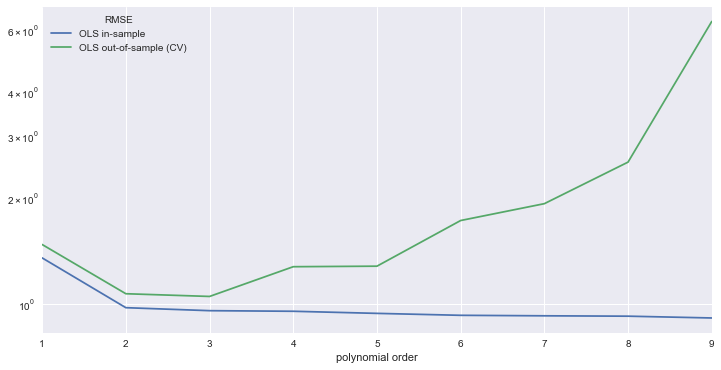

In [72]:
f,ax = plt.subplots(figsize=(12,6))
rmse_df = pd.DataFrame(data = [rmse_in_sample, rmse_CV],
                       index = ['OLS in-sample', 'OLS out-of-sample (CV)'],
                       columns = range(1,10)).T

rmse_df.columns.name = 'RMSE'
rmse_df.index.name = 'polynomial order'
rmse_df.plot(ax=ax)
ax.set_yscale('log')

## Fitting polynomial (5)

Why does in-sample and out-of-sample estimates of RMSE diverse? Well, the coefficient of OLS are increasingly mis-estimated for higher and higher number of variables.

In [111]:
pd.concat(coef_CV,1).T

,1,2,3,4,5,6,7,8,9
1,6.234355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-6.146667,12.590554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.781354,-1.104807,9.249710,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.394433,22.107885,-25.078074,16.501495,NaN,NaN,NaN,NaN,NaN
5,7.678056,-73.795322,227.908655,-266.336210,112.593443,NaN,NaN,NaN,NaN
6,-24.034620,197.092328,-785.577926,1574.624054,-1482.858265,528.364240,NaN,NaN,NaN
7,-26.234597,139.009441,-235.967168,-318.984810,1647.278049,-1974.405448,777.934915,NaN,NaN
8,-2.480596,-149.025175,1496.517741,-6011.772182,12283.632851,-13177.716397,6927.394820,-1354.677227,NaN
9,-174.311112,2248.717158,-16219.517439,69637.464867,-182832.881188,294545.334322,-282663.341134,147727.564074,-32259.887872


## Regularization

*Why do we regularize?*

- To avoid overfitting and thus have better predictions

*How do we regularize?*

We make models which are less complex by reducing the number and/or size of the coefficients.


## Regularization (2)

*What does regularization look like?*

We add a penalty term our optimization procedure:
    
$$ \text{arg min}_\beta \, \underset{\text{MSE}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$

Introduction of penalties implies that increased model complexity has to be met with high increases precision of estimates.

## Regularization (3)

*What are some used penalty functions?*

The two most common penalty functions are L1 and L2 regularization.

- L1 regularization (***Lasso***): $R(\beta)=\sum_{j=1}^{p}|\beta_j|$ 
    - Makes coefficients sparse, i.e. selects variables by removing some (if $\lambda$ is high)
    
    
- L2 regularization (***Ridge***): $R(\beta)=\sum_{j=1}^{p}\beta_j^2$
    - Reduce coefficient size
    - Fast due to analytical solution
    
*To note:* The *Elastic Net* uses a combination of L1 and L2 regularization.

## Regularization (4)

*How the Lasso (L1 reg.) deviates from OLS*

<img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l1.png'>

## Regularization (5)

*How the Ridge regression (L2 reg.) deviates from OLS*

<img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l2.png'>

# Models for supervised machine learning

## Model overview

*Parametric models*
- regression models 
    - unbiased: OLS 
    - biased: ***Lasso*** (L1), ***Ridge*** (L2) - (regulariation)
- classifier
    - unbiased: logistic
    
*Other models*
- **random forest**
- **nearest neighbor**
- neural networks

## Fitting polynomial (6)

Training the model with Lasso

In [87]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=10, random_state=123)

X_s = {}
rmse_CV_L = []

for i in range(1,10):
    X_s['order '+str(i)] = x_range**i
    X = pd.concat(X_s, axis=1)
    
    rmse_fold = []
    
    # cross validation loop
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
        
        # use Lasso with lambda = .05
        y_pred = Lasso(alpha=0.05)
                    .fit(X_train, y_train)
                    .predict(X_test)
        
        rmse = np.sqrt(mse(y_test, y_pred))
        rmse_fold.append(rmse)
    
    rmse_CV_L.append(np.mean(rmse_fold))

## Fitting polynomial (7)

Lasso vs OLS performance

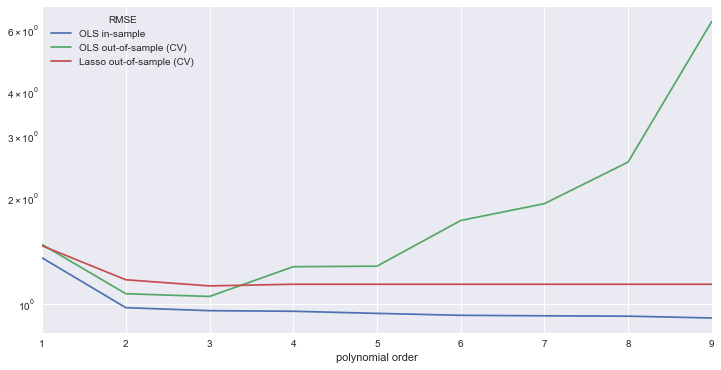

In [75]:
f,ax = plt.subplots(figsize=(12,6))
rmse_df['Lasso out-of-sample (CV)'] = rmse_CV_L
rmse_df.plot(ax=ax)
ax.set_yscale('log')

## Fitting polynomial (8)

Tuning The Lasso

In [ ]:
X = pd.concat(X_s, axis=1)

rmse_CV_lambda = []
coef_CV_lambda = []

for l in np.arange(.0001,.01,.0001): # loop over different values of lambda
  
    rmse_fold = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    

        model = Lasso(alpha=l).fit(X_train,y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mse(y_test, y_pred))
        rmse_fold.append(rmse)
    
    coef_CV_lambda.append(model.coef_)    
    rmse_CV_lambda.append([l, np.mean(rmse_fold)])

## Fitting polynomial (9)

We search the $\lambda$ grid : 0.0001-0.01 to find the optimal $\lambda$ parameter

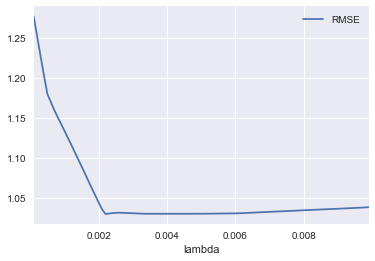

In [89]:
rmse_lambda_df = pd.DataFrame(rmse_CV_lambda,columns=['lambda', 'RMSE']).set_index('lambda')

rmse_lambda_df.plot()

## Fitting polynomial (10)

Model for optimal lambda

In [34]:
lambda_opt = rmse_lambda_df.idxmin()
lambda_opt

RMSE    0.0022
dtype: float64

Parameters for optimal lambda

In [78]:
coefs = pd.DataFrame(coef_CV_lambda,columns=range(1,10),index=np.arange(.0001,.01,.0001))
print(coefs.loc[lambda_opt])

               1    2         3    4    5    6    7    8    9
0.0022 -0.077694  0.0  6.793418  0.0  0.0 -0.0 -0.0 -0.0 -0.0


## Summary causality

*Selection bias*: Issue for observational studies where treatment is correlated with baseline outcome.

*Randomization*: Enactment of treatments that are assigned randomly and thus do not suff selection biases. 

## Summary supervised learning

*Prediction/postdiction*: Application of  model to estimate response/output associated with input. 

*Bias-variance tradeoff*: There exist models beside OLS which can improve better at out-of-sample predictions, however, they have biased parameter estimates.

*Prediction types*: 
- when the response is numeric (continuous) the problem is called *regression*
- when response is categorical (discrete) the problem is called *classification*

*MAE/RMSE*: measures of prediction accuracy for regression problems

*Cross validation*: Split data in test and training data. Train model on training data, test it on test data.

*Regularization*: A technique used to model bias in an attempt to solve overfitting problems